In [76]:
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
import numpy as np
import torch
from tqdm import tqdm

In [77]:
path="data/raw/HIV.csv"
data=pd.read_csv(path)

In [78]:
data.head()

,smiles,activity,HIV_active
0,CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...,CI,0
1,C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...,CI,0
2,CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21,CI,0
3,Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1,CI,0
4,O=S(=O)(O)CCS(=O)(=O)O,CI,0


In [79]:
data.shape,data["HIV_active"].value_counts()

((41127, 3),
 HIV_active
 0    39684
 1     1443
 Name: count, dtype: int64)

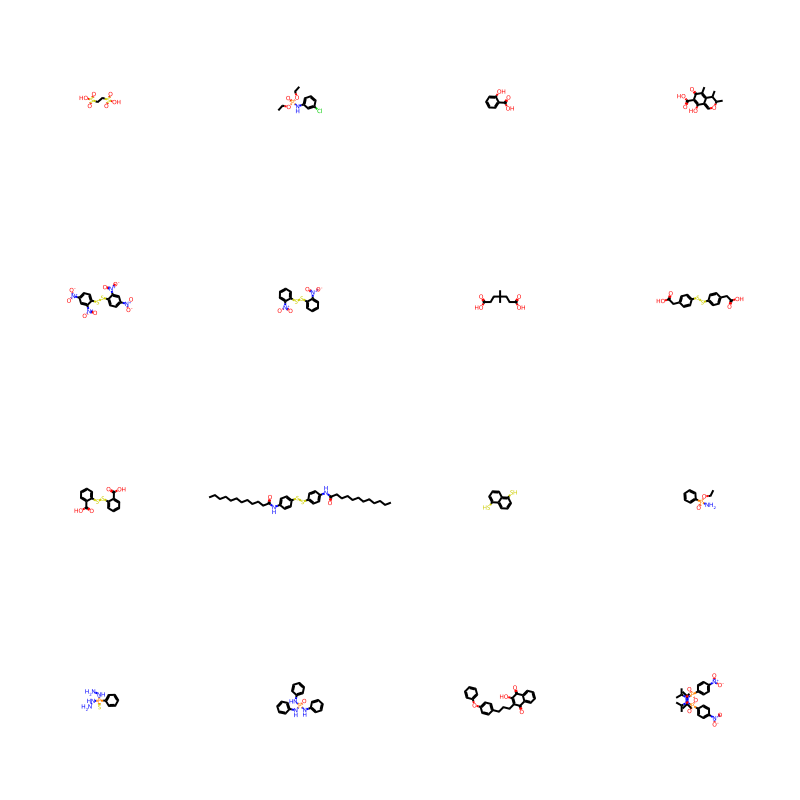

In [80]:
sample_smiles = data["smiles"][4:20].values
sample_mols = [Chem.MolFromSmiles(smiles) for \
               smiles in sample_smiles]
grid = Draw.MolsToGridImage(sample_mols,
                            molsPerRow=4,
                            subImgSize=(200,200))
grid

In [81]:
def _get_node_features(mol):      
    all_node_feats = []

    for atom in mol.GetAtoms():
        node_feats = []
        # Feature 1: Atomic number        
        node_feats.append(atom.GetAtomicNum())
        # Feature 2: Atom degree
        node_feats.append(atom.GetDegree())
        # Feature 3: Formal charge
        node_feats.append(atom.GetFormalCharge())
        # Feature 4: Hybridization
        node_feats.append(atom.GetHybridization())
        # Feature 5: Aromaticity
        node_feats.append(atom.GetIsAromatic())
         # Feature 6: Total Num Hs
        node_feats.append(atom.GetTotalNumHs())
        # Feature 7: Radical Electrons
        node_feats.append(atom.GetNumRadicalElectrons())
        # Feature 8: In Ring
        node_feats.append(atom.IsInRing())
        # Feature 9: Chirality
        node_feats.append(atom.GetChiralTag())

        # Append node features to matrix
        all_node_feats.append(node_feats)

    all_node_feats = np.asarray(all_node_feats)
    return torch.tensor(all_node_feats, dtype=torch.float)

def _get_edge_features(mol):

    all_edge_feats = []

    for bond in mol.GetBonds():
        edge_feats = []
        # Feature 1: Bond type (as double)
        edge_feats.append(bond.GetBondTypeAsDouble())
        # Feature 2: Rings
        edge_feats.append(bond.IsInRing())
        # Append node features to matrix (twice, per direction)
        all_edge_feats += [edge_feats, edge_feats]

    all_edge_feats = np.asarray(all_edge_feats)
    return torch.tensor(all_edge_feats, dtype=torch.float)

def _get_adjacency_info(mol):
    edge_indices = []
    for bond in mol.GetBonds():
        i = bond.GetBeginAtomIdx()
        j = bond.GetEndAtomIdx()
        edge_indices += [[i, j], [j, i]]

    edge_indices = torch.tensor(edge_indices)
    edge_indices = edge_indices.t().to(torch.long).view(2, -1)
    return edge_indices

def _get_labels(label):
    label = np.asarray([label])
    return torch.tensor(label, dtype=torch.int64)


In [101]:
for smiles in sample_smiles:
    mol_obj = Chem.MolFromSmiles(smiles)
    node_feats = _get_node_features(mol_obj)
    edge_feats = _get_edge_features(mol_obj)
    edge_index = _get_adjacency_info(mol_obj)
    label = _get_labels(mol["HIV_active"])
    print(node_feats.shape,edge_feats.shape,edge_index.shape,label)
    

torch.Size([10, 9]) torch.Size([18, 2]) torch.Size([2, 18]) tensor([0])
torch.Size([16, 9]) torch.Size([32, 2]) torch.Size([2, 32]) tensor([0])
torch.Size([10, 9]) torch.Size([20, 2]) torch.Size([2, 20]) tensor([0])
torch.Size([18, 9]) torch.Size([38, 2]) torch.Size([2, 38]) tensor([0])
torch.Size([26, 9]) torch.Size([54, 2]) torch.Size([2, 54]) tensor([0])
torch.Size([20, 9]) torch.Size([42, 2]) torch.Size([2, 42]) tensor([0])
torch.Size([13, 9]) torch.Size([24, 2]) torch.Size([2, 24]) tensor([0])
torch.Size([22, 9]) torch.Size([46, 2]) torch.Size([2, 46]) tensor([0])
torch.Size([20, 9]) torch.Size([42, 2]) torch.Size([2, 42]) tensor([0])
torch.Size([42, 9]) torch.Size([86, 2]) torch.Size([2, 86]) tensor([0])
torch.Size([12, 9]) torch.Size([26, 2]) torch.Size([2, 26]) tensor([0])
torch.Size([12, 9]) torch.Size([24, 2]) torch.Size([2, 24]) tensor([0])
torch.Size([12, 9]) torch.Size([24, 2]) torch.Size([2, 24]) tensor([0])
torch.Size([23, 9]) torch.Size([50, 2]) torch.Size([2, 50]) tens

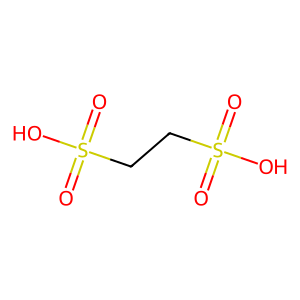

In [109]:
sample_mol_obj_0=Chem.MolFromSmiles(sample_smiles[0])
Draw.MolToImage(sample_mol_obj_0)

In [116]:
all_node_feats=[]
for atom in sample_mol_obj_0.GetAtoms():
        node_feats = []        
        node_feats.append(atom.GetAtomicNum())
        print(atom.GetAtomicNum(),end=' ')
        node_feats.append(atom.GetDegree())
        node_feats.append(atom.GetFormalCharge())
        node_feats.append(atom.GetHybridization())
        node_feats.append(atom.GetIsAromatic())
        node_feats.append(atom.GetTotalNumHs())
        node_feats.append(atom.GetNumRadicalElectrons())
        node_feats.append(atom.IsInRing())
        node_feats.append(atom.GetChiralTag())

        all_node_feats.append(node_feats)


8 16 8 8 6 6 16 8 8 8 